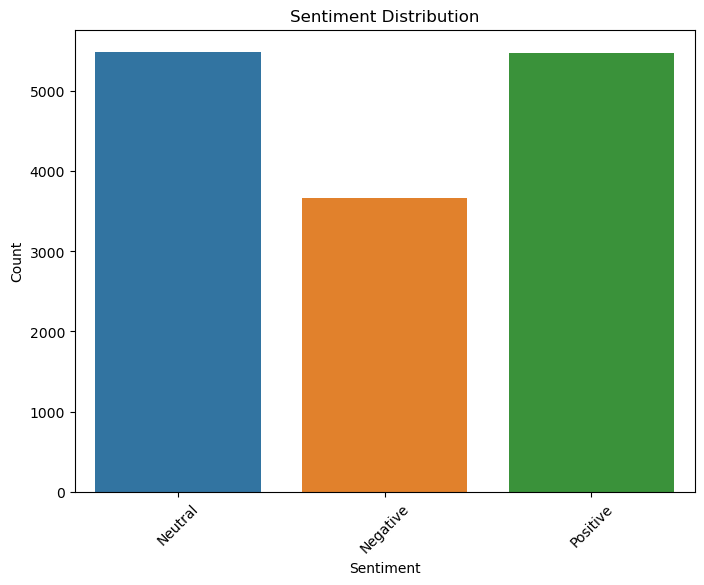

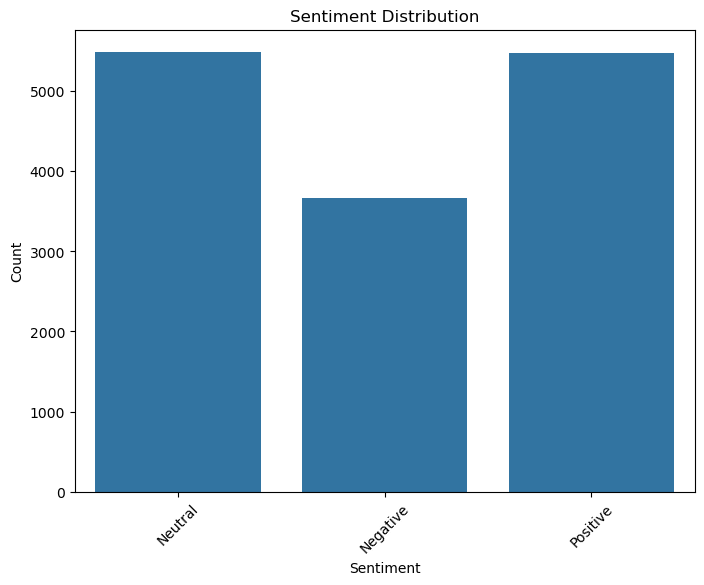

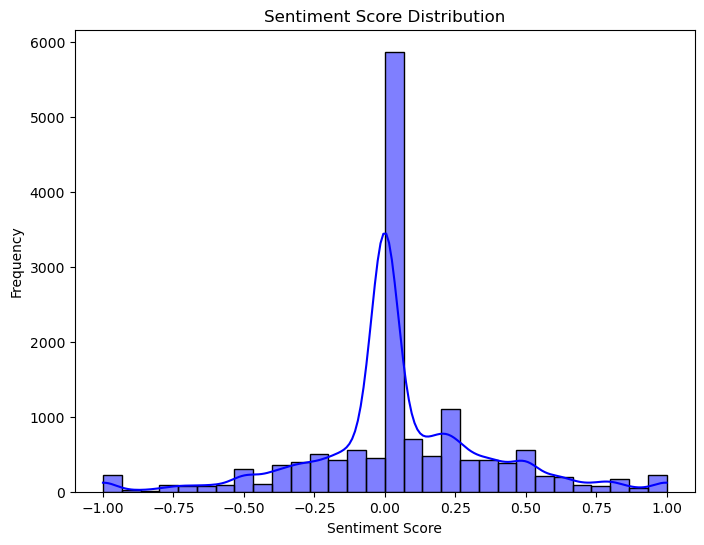

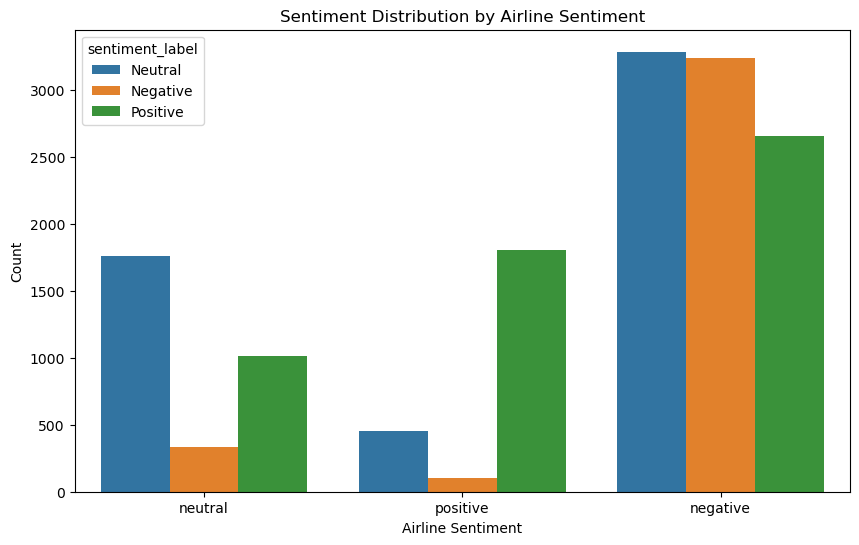

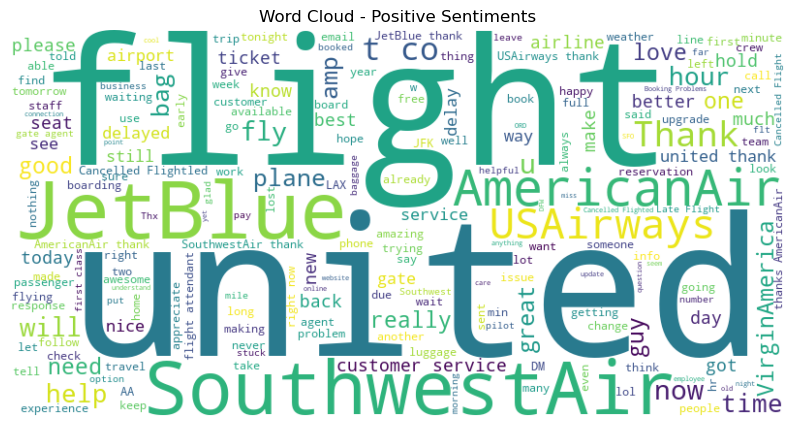

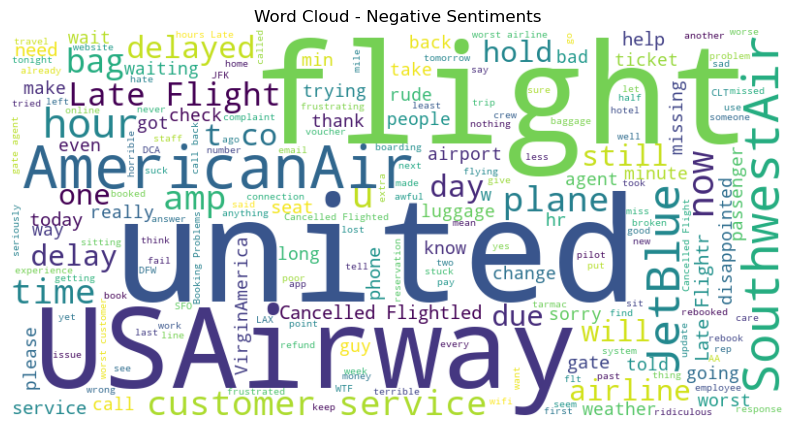

In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from textblob import TextBlob
from wordcloud import WordCloud

# Load the dataset
df = pd.read_csv('data/Tweets.csv')  # Make sure to set the correct path to your dataset

# Data Cleaning
df = df[['text', 'airline_sentiment']]  # Retain only relevant columns
df.dropna(inplace=True)  # Drop rows with missing values

# Sentiment Analysis using TextBlob
def get_sentiment(text):
    analysis = TextBlob(text)
    return analysis.sentiment.polarity  # Returns a score from -1 to 1

df['sentiment_score'] = df['text'].apply(get_sentiment)

# Apply sentiment label based on sentiment score
def sentiment_label(score):
    if score > 0:
        return 'Positive'
    elif score == 0:
        return 'Neutral'
    else:
        return 'Negative'

df['sentiment_label'] = df['sentiment_score'].apply(sentiment_label)
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='sentiment_label', hue='sentiment_label')
plt.title('Sentiment Distribution')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

# Visualization 1: Sentiment Distribution (Bar Chart)
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='sentiment_label')
plt.title('Sentiment Distribution')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

# Visualization 2: Sentiment Score Distribution (Histogram & KDE)
plt.figure(figsize=(8, 6))
sns.histplot(df['sentiment_score'], kde=True, color='blue', bins=30)
plt.title('Sentiment Score Distribution')
plt.xlabel('Sentiment Score')
plt.ylabel('Frequency')
plt.show()

# Visualization 3: Sentiment by Airline (Stacked Bar Chart)
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='airline_sentiment', hue='sentiment_label')
plt.title('Sentiment Distribution by Airline Sentiment')
plt.xlabel('Airline Sentiment')
plt.ylabel('Count')
plt.show()

# Visualization 4: Word Cloud for Positive Sentiments
positive_tweets = df[df['sentiment_label'] == 'Positive']['text'].str.cat(sep=' ')
positive_wordcloud = WordCloud(width=800, height=400, background_color='white').generate(positive_tweets)

plt.figure(figsize=(10, 8))
plt.imshow(positive_wordcloud, interpolation='bilinear')
plt.title('Word Cloud - Positive Sentiments')
plt.axis('off')
plt.show()


# Visualization 5: Word Cloud for Negative Sentiments
negative_tweets = df[df['sentiment_label'] == 'Negative']['text'].str.cat(sep=' ')
negative_wordcloud = WordCloud(width=800, height=400, background_color='white').generate(negative_tweets)

plt.figure(figsize=(10, 8))
plt.imshow(negative_wordcloud, interpolation='bilinear')
plt.title('Word Cloud - Negative Sentiments')
plt.axis('off')
plt.show()
